In [55]:
#scolha pelo menos 20 ações candidatas da bolsa brasileira (B3). Para isso, use o critério que preferir.

#escolhi ações que estavam subindo sua cotação na b3 e de diferentes setores \

acoes_iniciais =['MLAS3.SA','VALE3.SA','ABEV3.SA','AZUL4.SA','GOLL4.SA','PETR4.SA','AERI3.SA','BBDC4.SA','ITSA4.SA','PSSA3.SA','CXSE3.SA','OIBR4.SA','DESK3.SA','CBAV3.SA','PGMN3.SA','VVEO3.SA','RADL3.SA','SAPR11.SA','CBAV3.SA','CLSC4.SA']


In [56]:
# criando portifólio 
import pandas as pd 
import yfinance as yf 
import matplotlib.pyplot as plt



acoes_sharpee_positivo=[]
sharpe_ideal=0
data_teste = pd.DataFrame()


for i in range (len(acoes_iniciais)):
    acao_teste = acoes_iniciais[i]
    ticker_teste=yf.Ticker(acoes_iniciais[i])
    data_teste_acao= ticker_teste.history(period='18mo')

    #colocando investimento inicial e adicionando uma coluna com o valor 
    investimento_inicial = 1000 # reais
    n_acoes_teste = investimento_inicial / data_teste_acao.iloc[0]['Close']
    data_teste_acao['Valor investido'] = n_acoes_teste * data_teste_acao['Close']

    #colocando esse valor no meu portifólio teste
    data_teste['Valor investido'] = data_teste_acao['Valor investido'] 

    #calculando o retorno do portifólio teste
    ret_total_teste = (data_teste.iloc[-1]['Valor investido']/data_teste.iloc[0]['Valor investido'] - 1)

    #calculando o desvio padrão do portifólio pelo desvio do retorno diario teste
    ret_teste = data_teste['Valor investido'].pct_change()
    sigma_teste= ret_teste.std()

    #calculando sharpee do portifolio teste
    sharpe_teste = ret_total_teste/sigma_teste
    #tirando retorno negativo
    if sharpe_teste>0:
        acoes_sharpee_positivo.append(acao_teste)
        if sharpe_teste > sharpe_ideal:
            acao1=acao_teste
            ticker=yf.Ticker(acao1)
            data1= ticker.history(period='18mo')
            #colocando investimento inicial e adicionando uma coluna com o valor 
            n_acoes1 = investimento_inicial / data1.iloc[0]['Close']
            data1['Valor investido'] = n_acoes1 * data1['Close']
            sharpe_ideal=sharpe_teste


C:\Users\Rafaela\AppData\Local\Temp\ipykernel_19120\3323989113.py:30: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  ret_teste = data_teste['Valor investido'].pct_change()


In [57]:
dict_sharpee = {'Portifolio': [], 'Sharpee':[], 'Ações do Portifólio': []}

df_sharpee= pd.DataFrame(dict_sharpee)


#colocando esse valor no meu portifólio
datap= pd.DataFrame()
datap['Valor investido'] = data1['Valor investido'] 

#calculando o retorno do portifólio
ret_totalp = (datap.iloc[-1]['Valor investido']/datap.iloc[0]['Valor investido'] - 1)

#calculando o desvio padrão do portifólio pelo desvio do retorno diario
retp = datap['Valor investido'].pct_change()
sigmap= retp.std()

#calculando sharpee do portifolio
sharpep_1 = ret_totalp/sigmap

print(sharpep_1)

df_sharpee.loc[0] = [1, sharpep_1, acao1]



df_sharpee.head()



53.75861007285058


,Portifolio,Sharpee,Ações do Portifólio
0,1,53.75861,PETR4.SA


In [58]:
#calculando a correlaçao entre o portifolio e as outras acoes 


df = pd.DataFrame()

acoes_sharpee_positivo.remove(acao1)

for i in range(len(acoes_sharpee_positivo)):
    acaon = acoes_sharpee_positivo[i]
    tickern = yf.Ticker(acoes_sharpee_positivo[i])
    datan= tickern.history(period='18mo')

    investimento_inicial = 1000 # reais
    n_acoes_sharpee_positivon = investimento_inicial / datan.iloc[0]['Close']
    datan['Valor investido'] = n_acoes_sharpee_positivon * datan['Close']
    
    ret1 = datap['Valor investido'].pct_change()
    retn = datan['Valor investido'].pct_change()

    df['portifolio'] = ret1
    df[acoes_sharpee_positivo[i]] = retn
    
print(acoes_sharpee_positivo)
df.corr()


['ITSA4.SA', 'PSSA3.SA', 'CXSE3.SA', 'VVEO3.SA', 'RADL3.SA', 'SAPR11.SA', 'CLSC4.SA']


,portifolio,ITSA4.SA,PSSA3.SA,CXSE3.SA,VVEO3.SA,RADL3.SA,SAPR11.SA,CLSC4.SA
portifolio,1.000000,0.373349,0.194892,0.249602,0.230445,0.113594,0.167796,0.187378
ITSA4.SA,0.373349,1.000000,0.401460,0.424232,0.370524,0.439047,0.257418,0.209351
PSSA3.SA,0.194892,0.401460,1.000000,0.342911,0.350993,0.284657,0.191783,0.166773
CXSE3.SA,0.249602,0.424232,0.342911,1.000000,0.284021,0.341843,0.209695,0.192417
VVEO3.SA,0.230445,0.370524,0.350993,0.284021,1.000000,0.383438,0.269769,0.196380
RADL3.SA,0.113594,0.439047,0.284657,0.341843,0.383438,1.000000,0.301810,0.136419
SAPR11.SA,0.167796,0.257418,0.191783,0.209695,0.269769,0.301810,1.000000,0.188883
CLSC4.SA,0.187378,0.209351,0.166773,0.192417,0.196380,0.136419,0.188883,1.000000


In [59]:
#vendo acao que me da retorno maior no portifolio
maior_sharpee=0

for acao in acoes_sharpee_positivo:
    ticker_2=yf.Ticker(acao)
    data2= ticker_2.history(period='18mo')

    n_acoes2 = investimento_inicial / data2.iloc[0]['Close']
    data2['Valor investido'] = n_acoes2 * data2['Close']


    datap['Valor investido'] = data1['Valor investido'] +data2['Valor investido']

    #calculando o retorno do portifólio
    ret_totalp = (datap.iloc[-1]['Valor investido']/datap.iloc[0]['Valor investido'] - 1)

    #calculando o desvio padrão do portifólio pelo desvio do retorno diario
    retp = datap['Valor investido'].pct_change()
    sigmap= retp.std()

    #calculando sharpee do portifolio
    sharpep_1 = ret_totalp / sigmap
    if sharpep_1>maior_sharpee:
        maior_sharpee=sharpep_1
        acao2=acao


acoes_sharpee_positivo.remove(acao2)


C:\Users\Rafaela\AppData\Local\Temp\ipykernel_19120\903537369.py:18: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  retp = datap['Valor investido'].pct_change()


In [60]:
#adicionando a acao com mais rendimendo ao portifólio real 

ticker=yf.Ticker(acao2)
data2 = ticker.history(period='18mo')


n_acoes2 = investimento_inicial / data2.iloc[0]['Close']
data2['Valor investido'] = n_acoes2 * data2['Close']


datap['Valor investido'] = data2['Valor investido'] + data1['Valor investido']

#calculando o retorno do portifólio
ret_totalp = (datap.iloc[-1]['Valor investido']/datap.iloc[0]['Valor investido'] - 1)

#calculando o desvio padrão do portifólio pelo desvio do retorno diario
retp = datap['Valor investido'].pct_change()
sigmap= retp.std()

#calculando sharpee do portifolio
sharpep_2 = ret_totalp/sigmap

print(sharpep_2)

df_sharpee.loc[1] = [2, sharpep_2, acao1+' , '+acao2]

df_sharpee.head()

53.805137917995985


,Portifolio,Sharpee,Ações do Portifólio
0,1,53.758610,PETR4.SA
1,2,53.805138,"PETR4.SA , PSSA3.SA"


In [61]:
#vendo acao que me da retorno maior no portifolio
maior_sharpee=0

for acao in acoes_sharpee_positivo:
    ticker_3=yf.Ticker(acao)
    data3= ticker_3.history(period='18mo')

    n_acoes3 = investimento_inicial / data3.iloc[0]['Close']
    data3['Valor investido'] = n_acoes3 * data3['Close']


    datap['Valor investido'] = data1['Valor investido'] +data2['Valor investido'] + data3['Valor investido']

    #calculando o retorno do portifólio
    ret_totalp = (datap.iloc[-1]['Valor investido']/datap.iloc[0]['Valor investido'] - 1)

    #calculando o desvio padrão do portifólio pelo desvio do retorno diario
    retp = datap['Valor investido'].pct_change()
    sigmap= retp.std()

    #calculando sharpee do portifolio
    sharpep_2 = ret_totalp / sigmap
    if sharpep_2>maior_sharpee:
        maior_sharpee=sharpep_2
        acao3=acao
acoes_sharpee_positivo.remove(acao3)

C:\Users\Rafaela\AppData\Local\Temp\ipykernel_19120\1691284919.py:18: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  retp = datap['Valor investido'].pct_change()


In [62]:
#adicionando a acao com mais rendimendo ao portifólio real 

ticker=yf.Ticker(acao3)
data3 = ticker.history(period='18mo')


n_acoes3 = investimento_inicial / data3.iloc[0]['Close']
data3['Valor investido'] = n_acoes3 * data3['Close']


datap['Valor investido'] = data2['Valor investido'] + data1['Valor investido'] + data3['Valor investido']

#calculando o retorno do portifólio
ret_totalp = (datap.iloc[-1]['Valor investido']/datap.iloc[0]['Valor investido'] - 1)

#calculando o desvio padrão do portifólio pelo desvio do retorno diario
retp = datap['Valor investido'].pct_change()
sigmap= retp.std()

#calculando sharpee do portifolio
sharpep_3 = ret_totalp/sigmap  

print(sharpep_3)

df_sharpee.loc[2] = [3, sharpep_3, acao1+' , '+acao2+' , '+acao3]

df_sharpee.head()

53.57509713665651


,Portifolio,Sharpee,Ações do Portifólio
0,1,53.758610,PETR4.SA
1,2,53.805138,"PETR4.SA , PSSA3.SA"
2,3,53.575097,"PETR4.SA , PSSA3.SA , CXSE3.SA"


In [63]:
#vendo acao que me da retorno maior no portifolio
maior_sharpee=0

for acao in acoes_sharpee_positivo:
    ticker_4=yf.Ticker(acao)
    data4= ticker_4.history(period='18mo')

    n_acoes4 = investimento_inicial / data4.iloc[0]['Close']
    data4['Valor investido'] = n_acoes4 * data4['Close']


    datap['Valor investido'] = data1['Valor investido'] +data2['Valor investido'] + data3['Valor investido'] + data4['Valor investido']

    #calculando o retorno do portifólio
    ret_totalp = (datap.iloc[-1]['Valor investido']/datap.iloc[0]['Valor investido'] - 1)

    #calculando o desvio padrão do portifólio pelo desvio do retorno diario
    retp = datap['Valor investido'].pct_change()
    sigmap= retp.std()

    #calculando sharpee do portifolio
    sharpep_3 = ret_totalp / sigmap
    if sharpep_3>maior_sharpee:
        maior_sharpee=sharpep_3
        acao4=acao
print(acao4)
acoes_sharpee_positivo.remove(acao4)

C:\Users\Rafaela\AppData\Local\Temp\ipykernel_19120\3857969926.py:18: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  retp = datap['Valor investido'].pct_change()


SAPR11.SA


In [64]:
#adicionando a acao com mais rendimendo ao portifólio real 

ticker=yf.Ticker(acao4)
data4 = ticker.history(period='18mo')


n_acoes4 = investimento_inicial / data4.iloc[0]['Close']
data4['Valor investido'] = n_acoes4 * data4['Close']


datap['Valor investido'] = data2['Valor investido'] + data1['Valor investido'] + data3['Valor investido'] + data4['Valor investido']

#calculando o retorno do portifólio
ret_totalp = (datap.iloc[-1]['Valor investido']/datap.iloc[0]['Valor investido'] - 1)

#calculando o desvio padrão do portifólio pelo desvio do retorno diario
retp = datap['Valor investido'].pct_change()
sigmap= retp.std()

#calculando sharpee do portifolio
sharpep_4 = ret_totalp/sigmap  

print(sharpep_4)

df_sharpee.loc[3] = [4, sharpep_4, acao1+' , '+acao2+' , '+acao3+' , '+acao4]

df_sharpee.head()

51.77357297226299


C:\Users\Rafaela\AppData\Local\Temp\ipykernel_19120\2892172038.py:17: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  retp = datap['Valor investido'].pct_change()


,Portifolio,Sharpee,Ações do Portifólio
0,1,53.758610,PETR4.SA
1,2,53.805138,"PETR4.SA , PSSA3.SA"
2,3,53.575097,"PETR4.SA , PSSA3.SA , CXSE3.SA"
3,4,51.773573,"PETR4.SA , PSSA3.SA , CXSE3.SA , SAPR11.SA"


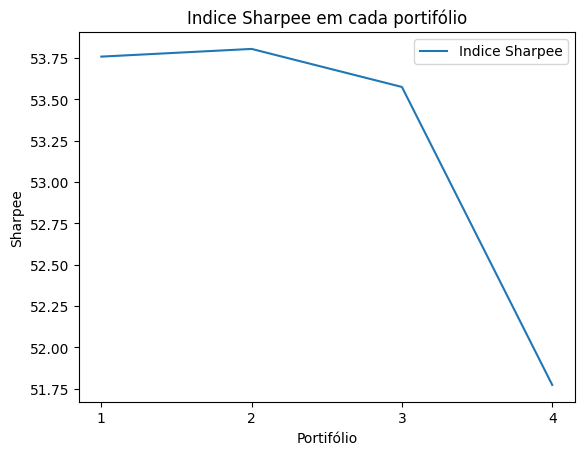

In [71]:
plt.figure()
plt.plot(df_sharpee['Sharpee'],label='Indice Sharpee')
plt.ylabel('Sharpee')
plt.title('Indice Sharpee em cada portifólio')
plt.xlabel('Portifólio')
plt.legend()
plt.legend()
plt.locator_params(axis='x', nbins=4)
plt.xticks([0,1,2,3],[1,2,3,4])
plt.show()

In [65]:
# acao3 = 'SAPR11.SA'
# ticker=yf.Ticker(acao3)
# data3 = ticker.history(period='18mo')

# acao4 = 'PSSA3.SA'
# ticker=yf.Ticker(acao4)
# data4 = ticker.history(period='18mo')


# n_acoes3 = investimento_inicial / data3.iloc[0]['Close']
# data3['Valor investido'] = n_acoes3 * data3['Close']

# n_acoes4 = investimento_inicial / data4.iloc[0]['Close']
# data4['Valor investido'] = n_acoes4 * data4['Close']

